# Vectorized String Operations
This notebook was adapted from one of the notebooks of [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/) by Jake VanderPlas.

-----

One strength of Python is its relative ease in handling and manipulating string data.
Pandas builds on this and provides a comprehensive set of *vectorized string operations* that become an essential piece of the type of munging required when working with (read: cleaning up) real-world data.
In this section, we'll walk through some of the Pandas string operations, and then take a look at using them to partially clean up a very messy dataset of recipes collected from the Internet.

## Introducing Pandas String Operations

We saw in previous sections how tools like NumPy and Pandas generalize arithmetic operations so that we can easily and quickly perform the same operation on many array elements. For example:

In [216]:
import numpy as np
x = np.array([2, 3, 5, 7, 11, 13])
x * 2

array([ 4,  6, 10, 14, 22, 26])

This *vectorization* of operations simplifies the syntax of operating on arrays of data: we no longer have to worry about the size or shape of the array, but just about what operation we want done.
For arrays of strings, NumPy does not provide such simple access, and thus you're stuck using a more verbose loop syntax:

In [217]:
data = ['peter', 'Paul', 'MARY', 'gUIDO']
[s.capitalize() for s in data]

['Peter', 'Paul', 'Mary', 'Guido']

This is perhaps sufficient to work with some data, but it will break if there are any missing values.
For example:

In [218]:
data = ['peter', 'Paul', None, 'MARY', 'gUIDO']
[s.capitalize() for s in data]

AttributeError: 'NoneType' object has no attribute 'capitalize'

Pandas includes features to address both this need for vectorized string operations and for correctly handling missing data via the ``str`` attribute of Pandas Series and Index objects containing strings.
So, for example, suppose we create a Pandas Series with this data:

In [219]:
import pandas as pd
names = pd.Series(data)
names

0    peter
1     Paul
2     None
3     MARY
4    gUIDO
dtype: object

We can now call a single method that will capitalize all the entries, while skipping over any missing values:

In [220]:
names.str.capitalize()

0    Peter
1     Paul
2     None
3     Mary
4    Guido
dtype: object

Using tab completion on this ``str`` attribute will list all the vectorized string methods available to Pandas.

## Tables of Pandas String Methods

If you have a good understanding of string manipulation in Python, most of Pandas string syntax is intuitive enough that it's probably sufficient to just list a table of available methods; we will start with that here, before diving deeper into a few of the subtleties.
The examples in this section use the following series of names:

In [221]:
monte = pd.Series(['Graham Chapman', 'John Cleese', 'Terry Gilliam',
                   'Eric Idle', 'Terry Jones', 'Michael Palin'])

### Methods similar to Python string methods
Nearly all Python's built-in string methods are mirrored by a Pandas vectorized string method. Here is a list of Pandas ``str`` methods that mirror Python string methods:

|             |                  |                  |                  |
|-------------|------------------|------------------|------------------|
|``len()``    | ``lower()``      | ``translate()``  | ``islower()``    | 
|``ljust()``  | ``upper()``      | ``startswith()`` | ``isupper()``    | 
|``rjust()``  | ``find()``       | ``endswith()``   | ``isnumeric()``  | 
|``center()`` | ``rfind()``      | ``isalnum()``    | ``isdecimal()``  | 
|``zfill()``  | ``index()``      | ``isalpha()``    | ``split()``      | 
|``strip()``  | ``rindex()``     | ``isdigit()``    | ``rsplit()``     | 
|``rstrip()`` | ``capitalize()`` | ``isspace()``    | ``partition()``  | 
|``lstrip()`` |  ``swapcase()``  |  ``istitle()``   | ``rpartition()`` |

Notice that these have various return values. Some, like ``lower()``, return a series of strings:

In [222]:
monte.str.lower()

0    graham chapman
1       john cleese
2     terry gilliam
3         eric idle
4       terry jones
5     michael palin
dtype: object

But some others return numbers:

In [223]:
monte.str.len()

0    14
1    11
2    13
3     9
4    11
5    13
dtype: int64

Or Boolean values:

In [224]:
monte.str.startswith('T')

0    False
1    False
2     True
3    False
4     True
5    False
dtype: bool

Still others return lists or other compound values for each element:

In [225]:
monte.str.split()

0    [Graham, Chapman]
1       [John, Cleese]
2     [Terry, Gilliam]
3         [Eric, Idle]
4       [Terry, Jones]
5     [Michael, Palin]
dtype: object

We'll see further manipulations of this kind of series-of-lists object as we continue our discussion.

### Methods using regular expressions

In addition, there are several methods that accept regular expressions to examine the content of each string element, and follow some of the API conventions of Python's built-in ``re`` module:

| Method | Description |
|--------|-------------|
| ``match()`` | Call ``re.match()`` on each element, returning a boolean. |
| ``extract()`` | Call ``re.match()`` on each element, returning matched groups as strings.|
| ``findall()`` | Call ``re.findall()`` on each element |
| ``replace()`` | Replace occurrences of pattern with some other string|
| ``contains()`` | Call ``re.search()`` on each element, returning a boolean |
| ``count()`` | Count occurrences of pattern|
| ``split()``   | Equivalent to ``str.split()``, but accepts regexps |
| ``rsplit()`` | Equivalent to ``str.rsplit()``, but accepts regexps |

With these, you can do a wide range of interesting operations.
For example, we can extract the first name from each by asking for a contiguous group of characters at the beginning of each element:

In [226]:
monte.str.extract('([A-Za-z]+)', expand=False)

0     Graham
1       John
2      Terry
3       Eric
4      Terry
5    Michael
dtype: object

Or we can do something more complicated, like finding all names that start and end with a consonant, making use of the start-of-string (``^``) and end-of-string (``$``) regular expression characters:

In [227]:
monte.str.findall(r'^[^AEIOU].*[^aeiou]$')

0    [Graham Chapman]
1                  []
2     [Terry Gilliam]
3                  []
4       [Terry Jones]
5     [Michael Palin]
dtype: object

The ability to concisely apply regular expressions across ``Series`` or ``Dataframe`` entries opens up many possibilities for analysis and cleaning of data.

### Miscellaneous methods
Finally, there are some miscellaneous methods that enable other convenient operations:

| Method | Description |
|--------|-------------|
| ``get()`` | Index each element |
| ``slice()`` | Slice each element|
| ``slice_replace()`` | Replace slice in each element with passed value|
| ``cat()``      | Concatenate strings|
| ``repeat()`` | Repeat values |
| ``normalize()`` | Return Unicode form of string |
| ``pad()`` | Add whitespace to left, right, or both sides of strings|
| ``wrap()`` | Split long strings into lines with length less than a given width|
| ``join()`` | Join strings in each element of the Series with passed separator|
| ``get_dummies()`` | extract dummy variables as a dataframe |

#### Vectorized item access and slicing

The ``get()`` and ``slice()`` operations, in particular, enable vectorized element access from each array.
For example, we can get a slice of the first three characters of each array using ``str.slice(0, 3)``.
Note that this behavior is also available through Python's normal indexing syntax–for example, ``df.str.slice(0, 3)`` is equivalent to ``df.str[0:3]``:

In [228]:
monte.str[0:3]

0    Gra
1    Joh
2    Ter
3    Eri
4    Ter
5    Mic
dtype: object

Indexing via ``df.str.get(i)`` and ``df.str[i]`` is likewise similar.

These ``get()`` and ``slice()`` methods also let you access elements of arrays returned by ``split()``.
For example, to extract the last name of each entry, we can combine ``split()`` and ``get()``:

In [229]:
monte.str.split().str.get(-1)

0    Chapman
1     Cleese
2    Gilliam
3       Idle
4      Jones
5      Palin
dtype: object

#### Indicator variables

Another method that requires a bit of extra explanation is the ``get_dummies()`` method.
This is useful when your data has a column containing some sort of coded indicator.
For example, we might have a dataset that contains information in the form of codes, such as A="born in America," B="born in the United Kingdom," C="likes cheese," D="likes spam":

In [230]:
full_monte = pd.DataFrame({'name': monte,
                           'info': ['B|C|D', 'B|D', 'A|C',
                                    'B|D', 'B|C', 'B|C|D']})
full_monte

,name,info
0,Graham Chapman,B|C|D
1,John Cleese,B|D
2,Terry Gilliam,A|C
3,Eric Idle,B|D
4,Terry Jones,B|C
5,Michael Palin,B|C|D


The ``get_dummies()`` routine lets you quickly split-out these indicator variables into a ``DataFrame``:

In [231]:
full_monte['info'].str.get_dummies('|')

,A,B,C,D
0,0,1,1,1
1,0,1,0,1
2,1,0,1,0
3,0,1,0,1
4,0,1,1,0
5,0,1,1,1


With these operations as building blocks, you can construct an endless range of string processing procedures when cleaning your data.

We won't dive further into these methods here, but I encourage you to read through ["Working with Text Data"](http://pandas.pydata.org/pandas-docs/stable/text.html) in the Pandas online documentation, or to refer to the resources listed in [Further Resources](03.13-Further-Resources.ipynb).

# Example

In [232]:
import numpy as np
import pandas as pd
df = pd.read_csv("../data/IMDB-Movie-Data.csv", index_col="Title")

In [233]:
df.sample(3)

,Rank,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Title,,,,,,,,,,,
Oblivion,276,"Action,Adventure,Mystery",A veteran assigned to extract Earth's remainin...,Joseph Kosinski,"Tom Cruise, Morgan Freeman, Andrea Riseborough...",2013,124,7.0,410125,89.02,54.0
Pitch Perfect 2,412,"Comedy,Music",After a humiliating command performance at The...,Elizabeth Banks,"Anna Kendrick, Rebel Wilson, Hailee Steinfeld,...",2015,115,6.5,108306,183.44,63.0
Old Boy,214,"Action,Drama,Mystery","Obsessed with vengeance, a man sets out to fin...",Spike Lee,"Josh Brolin, Elizabeth Olsen, Samuel L. Jackso...",2013,104,5.8,54679,NaN,49.0


In [234]:
df["Actors"].str.len().describe()

count    1000.000000
mean       58.288000
std         5.736721
min        43.000000
25%        54.000000
50%        58.000000
75%        62.000000
max        77.000000
Name: Actors, dtype: float64

In [235]:
df["Description"].str.contains('Angeles|York').sum()

38

## Expanding the Genres

In [236]:
df["Genre"].head()

Title
Guardians of the Galaxy     Action,Adventure,Sci-Fi
Prometheus                 Adventure,Mystery,Sci-Fi
Split                               Horror,Thriller
Sing                        Animation,Comedy,Family
Suicide Squad              Action,Adventure,Fantasy
Name: Genre, dtype: object

In [237]:
df["Genre"].str.split(",")

Title
Guardians of the Galaxy     [Action, Adventure, Sci-Fi]
Prometheus                 [Adventure, Mystery, Sci-Fi]
Split                                [Horror, Thriller]
Sing                        [Animation, Comedy, Family]
Suicide Squad              [Action, Adventure, Fantasy]
                                       ...             
Secret in Their Eyes            [Crime, Drama, Mystery]
Hostel: Part II                                [Horror]
Step Up 2: The Streets          [Drama, Music, Romance]
Search Party                        [Adventure, Comedy]
Nine Lives                    [Comedy, Family, Fantasy]
Name: Genre, Length: 1000, dtype: object

Counting the number of actors by movie

In [238]:
newdf = df["Genre"].str.split(",").explode()
newdf.head()

Title
Guardians of the Galaxy       Action
Guardians of the Galaxy    Adventure
Guardians of the Galaxy       Sci-Fi
Prometheus                 Adventure
Prometheus                   Mystery
Name: Genre, dtype: object

Get the most frequent genres ...

In [239]:
newdf.value_counts()[:5]

Drama        513
Action       303
Comedy       279
Adventure    259
Thriller     195
Name: Genre, dtype: int64

Counting the number of movies that contain $n$ genres

In [240]:
newdf.reset_index().groupby("Title").count().value_counts()

Genre
3        658
2        235
1        105
6          1
dtype: int64

## Some charts

In [241]:
df.sample(3)

,Rank,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Title,,,,,,,,,,,
Viral,645,"Drama,Horror,Sci-Fi",Following the outbreak of a virus that wipes o...,Henry Joost,"Sofia Black-D'Elia, Analeigh Tipton,Travis Top...",2016,85,5.5,3564,NaN,72.0
Forgetting Sarah Marshall,481,"Comedy,Drama,Romance",Devastated Peter takes a Hawaiian vacation in ...,Nicholas Stoller,"Kristen Bell, Jason Segel, Paul Rudd, Mila Kunis",2008,111,7.2,226619,62.88,67.0
The Stanford Prison Experiment,868,"Biography,Drama,History",Twenty-four male students out of seventy-five ...,Kyle Patrick Alvarez,"Ezra Miller, Tye Sheridan, Billy Crudup, Olivi...",2015,122,6.9,20907,0.64,67.0


In [242]:
df["Genre"] = df["Genre"].str.split(",")

In [243]:
df = df.explode("Genre")

In [244]:
df.head()

,Rank,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Title,,,,,,,,,,,
Guardians of the Galaxy,1,Action,A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
Guardians of the Galaxy,1,Adventure,A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
Guardians of the Galaxy,1,Sci-Fi,A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
Prometheus,2,Adventure,"Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
Prometheus,2,Mystery,"Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0


In [245]:
mydata = df[ df["Genre"].isin(["Action","Adventure", "Sci-Fi"])]

In [247]:
votes = mydata.pivot_table('Votes', index='Year', columns='Genre', aggfunc='sum')
votes

Genre,Action,Adventure,Sci-Fi
Year,,,
2006,3559673,3523619,2175616
2007,3720243,3467813,1616169
2008,7885922,3648741,1991008
2009,4963270,6656551,2562534
2010,7268992,7774100,2629791
2011,6146274,5367334,4170205
2012,7050597,6238296,3324587
2013,8062729,6959905,4495531
2014,9801483,9029158,6567704


In [246]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()  # use Seaborn styles

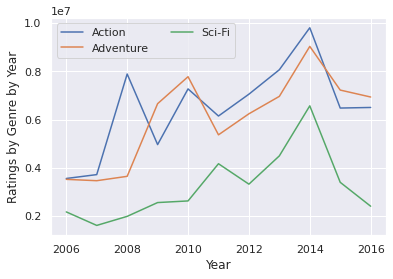

In [292]:
votes.plot()
plt.legend(ncol=2, loc='upper left')
plt.ylabel('Ratings by Genre by Year');

The same result can be achieved using `plt.plot()`

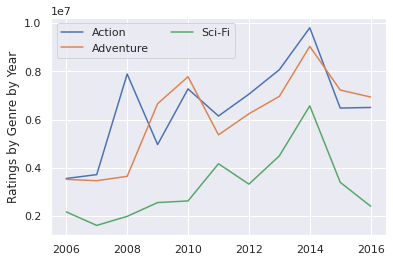

In [293]:
#plt.figure(figsize=(12,8))
plt.plot(votes);
plt.legend(votes.columns, ncol=2, loc='upper left')
plt.ylabel('Ratings by Genre by Year');

histogram ...

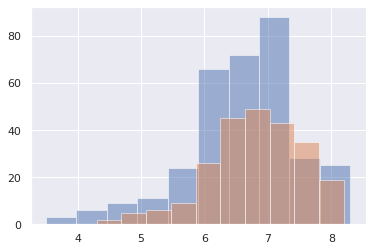

In [270]:
plt.hist(df[df["Year"]==2015]["Rating"], alpha=0.5)
plt.hist(df[df["Year"]==2013]["Rating"], alpha=0.5);

### seaborn.kdeplot
Rather than a histogram, we can get a smooth estimate of the distribution using a kernel density estimation, which Seaborn does with `sns.kdeplot`. For additional information check [seaborn.kdeplot](https://seaborn.pydata.org/generated/seaborn.kdeplot.html)

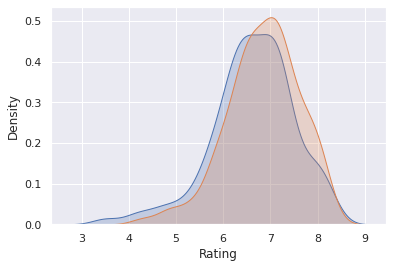

In [271]:
sns.kdeplot(df[df["Year"]==2015]["Rating"], shade=True)
sns.kdeplot(df[df["Year"]==2013]["Rating"], shade=True);

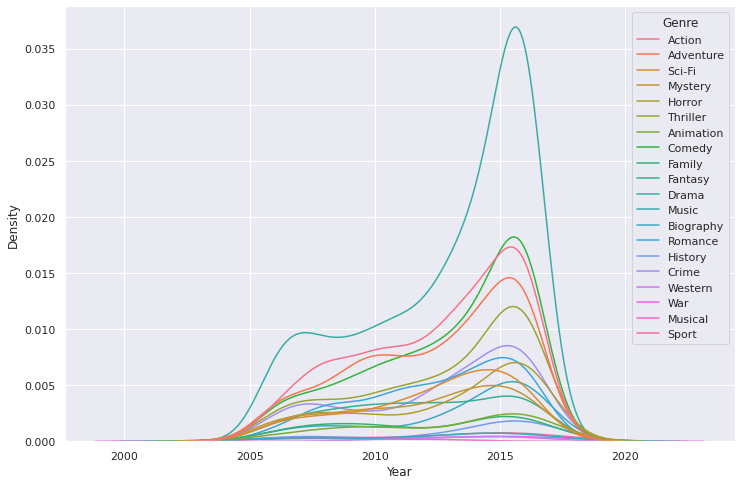

In [275]:
plt.figure(figsize=(12,8))
sns.kdeplot(data=df, x="Year", hue="Genre");

## seaborn.catplot
This function provides access to several axes-level functions that show the relationship between a numerical and one or more categorical variables using one of several visual representations.
Check [seaborn.catplot](https://seaborn.pydata.org/generated/seaborn.catplot.html) for additional info

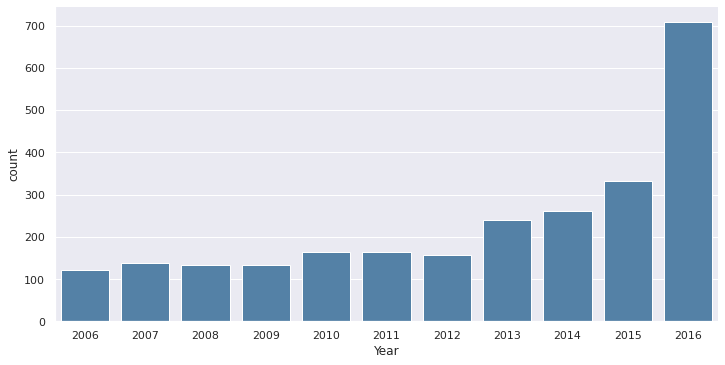

In [286]:
sns.catplot(data=df, x="Year", kind="count", aspect=2, color='steelblue');

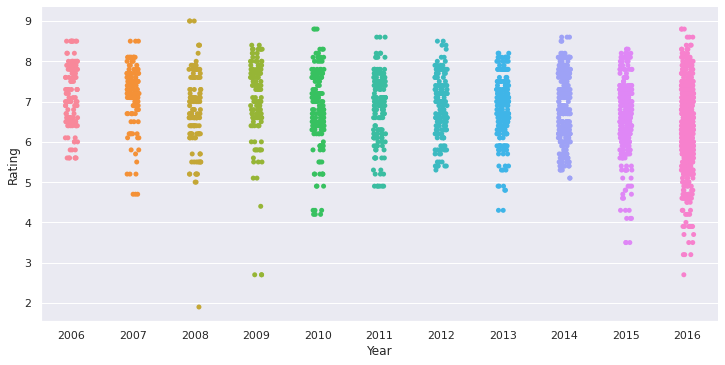

In [285]:
sns.catplot(data=df, x="Year", y="Rating", aspect=2);

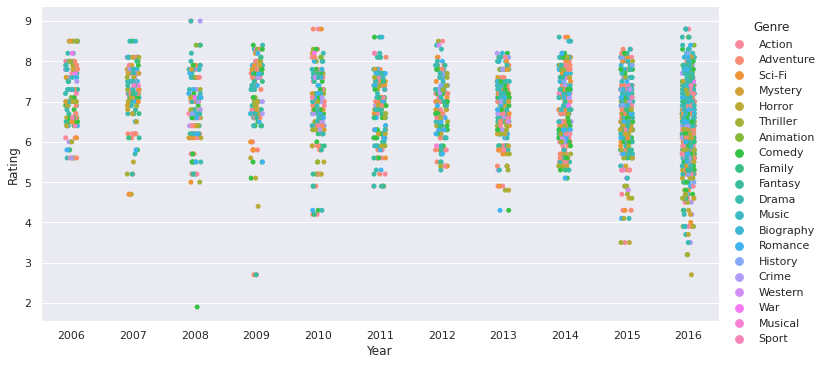

In [287]:
sns.catplot(data=df, x="Year", y="Rating", hue="Genre", aspect=2);

For additional examples, check [seaborn: statistical data visualization](https://seaborn.pydata.org/index.html)
and [Visualization with Seaborn](https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html)
    